<a href="https://colab.research.google.com/github/otang47/Landscape-Painting-Classification/blob/main/cis107_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **What is it?**

This CoLab notebook is created for you to experiment with some popular functionality of computer vision. We design it to be as easy 
to interact with as your Google Assistant. All functions are imported, meaning there is no need to write code. Refer to the commands below, you can then upload your own images and see what the program can do with them. More functionality will be added throughout the course.

\
### **Reference.**
Inside the parentheses of each command, you should put the name of your image file. For example,
```python
show_image("example.jpg")
```
Available commands:
1. show_image()
2. show_image_in_gray()
3. blur_image()
4. detect_edges()
5. detect_corners()
6. detect_features()
7. detect_objects()

### **Your experiments**

In [ ]:
# DO NOT MODIFY. This cell
# 1. creates a short cut to our "CIS107_Sandbox" folder
# 2. imports all the computer vision functionality
%%capture
!ln -sTf "/content/drive/My Drive/CIS107_Sandbox" "/content/CIS107_Sandbox"
%cd '/content/CIS107_Sandbox'
from toolkits import *

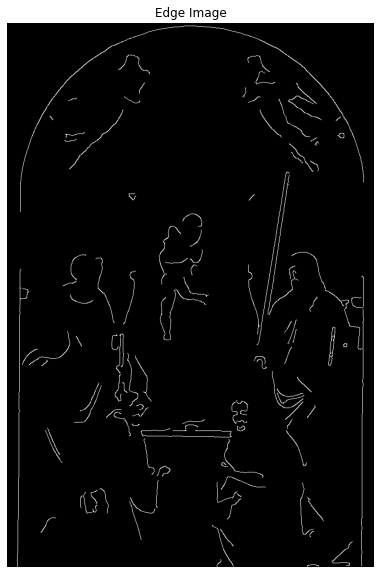

In [ ]:
detect_edges('example.jpg', blur_size=11)

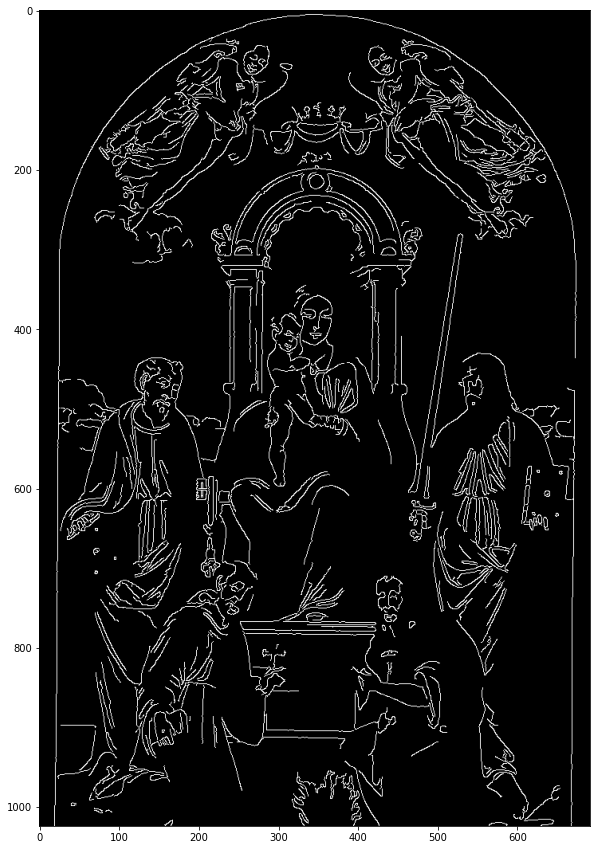

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('example.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur_scale = 3
img_blur = cv2.GaussianBlur(img_gray, (blur_scale, blur_scale), 0)
img_edges = cv2.Canny(img_blur, 100, 200)

plt.imshow(img_edges, cmap='gray')

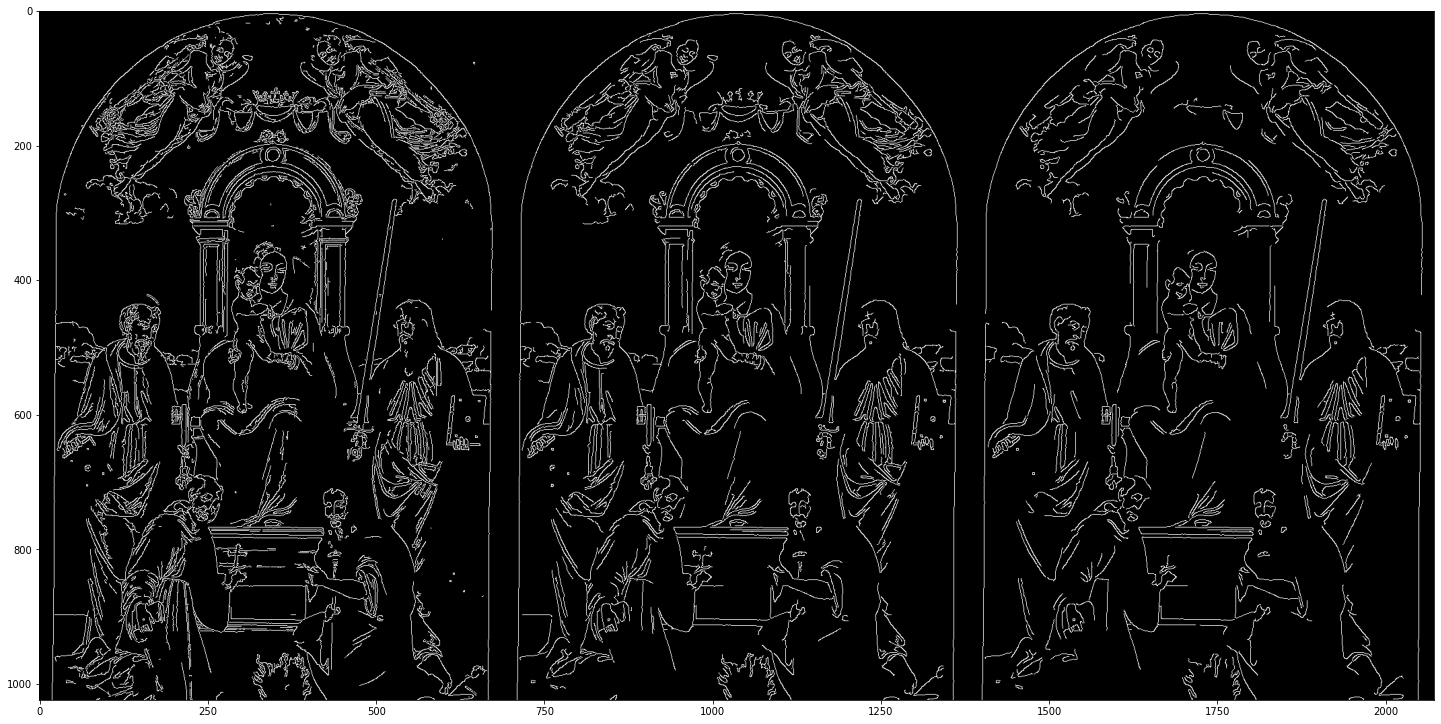

In [ ]:
# Setting 1
blur_scale = 1
img_blur = cv2.GaussianBlur(img_gray, (blur_scale, blur_scale), 0)
img_edges1 = cv2.Canny(img_blur, 100, 200)

# Setting 2
blur_scale = 3
img_blur = cv2.GaussianBlur(img_gray, (blur_scale, blur_scale), 0)
img_edges2 = cv2.Canny(img_blur, 100, 200)

# Setting 3
blur_scale = 5
img_blur = cv2.GaussianBlur(img_gray, (blur_scale, blur_scale), 0)
img_edges3 = cv2.Canny(img_blur, 100, 200)

plt.rcParams['figure.figsize'] = 25, 15
img_combine = np.hstack([img_edges1, img_edges2, img_edges3])
plt.imshow(img_combine, cmap='gray')

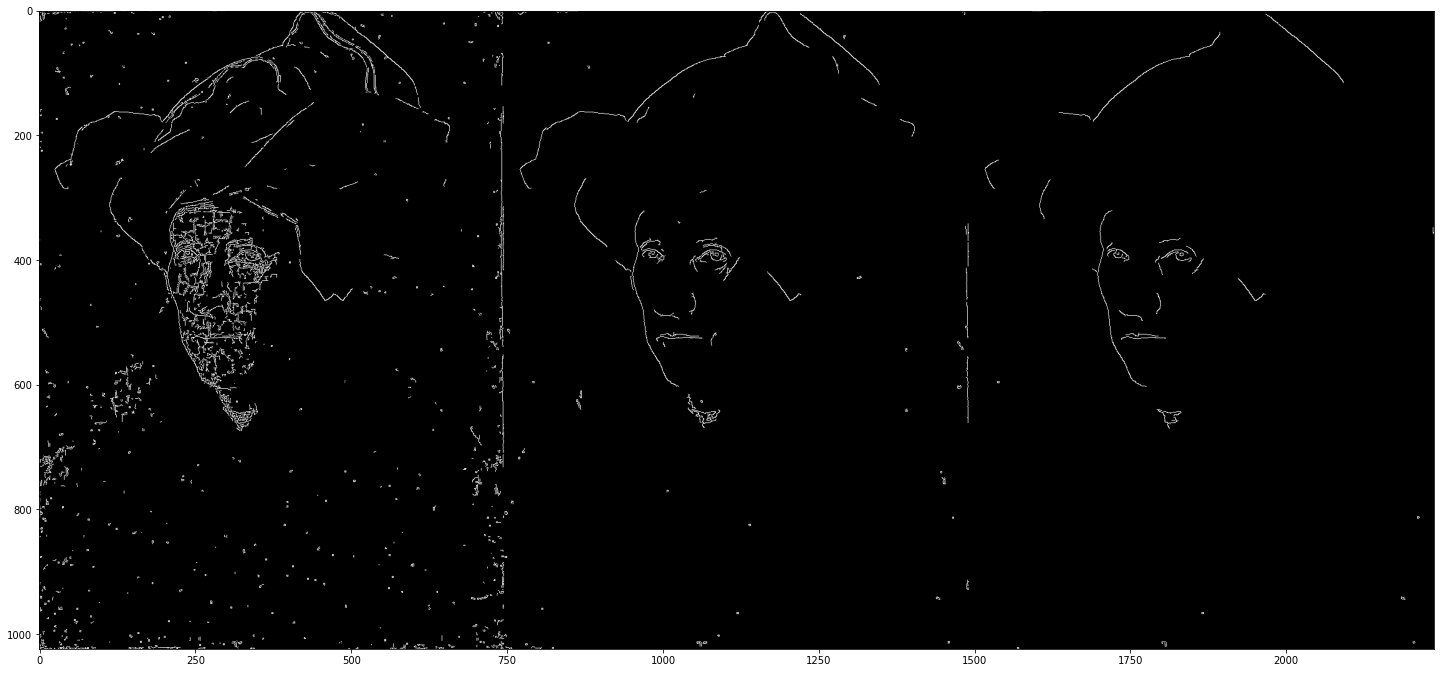

In [ ]:
img = cv2.imread('jan_van_eyck.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Setting 1
blur_scale = 1
img_blur = cv2.GaussianBlur(img_gray, (blur_scale, blur_scale), 0)
img_edges1 = cv2.Canny(img_blur, 100, 200)

# Setting 2
blur_scale = 3
img_blur = cv2.GaussianBlur(img_gray, (blur_scale, blur_scale), 0)
img_edges2 = cv2.Canny(img_blur, 100, 200)

# Setting 3
blur_scale = 5
img_blur = cv2.GaussianBlur(img_gray, (blur_scale, blur_scale), 0)
img_edges3 = cv2.Canny(img_blur, 100, 200)

plt.rcParams['figure.figsize'] = 25, 15
img_combine = np.hstack([img_edges1, img_edges2, img_edges3])
plt.imshow(img_combine, cmap='gray')

### **Web scraping: Google image**

In [ ]:
# Install packages
%%capture
!git clone https://github.com/Joeclinton1/google-images-download.git
%cd google-images-download
!python setup.py install
%cd ..

# Restart runtime
import os
os.kill(os.getpid(), 9)

In [ ]:
from google_images_download import google_images_download


folder = 'Google_images'

response = google_images_download.googleimagesdownload()                   #class instantiation
arguments = {"keywords": "country album covers wikipedia, hip hop album covers wikipedia",   #creating list of arguments
             "limit": 40, 
             "print_urls": False,
             "output_directory": folder}   

paths = response.download(arguments)   #passing the arguments to the function
print(paths)                           #printing absolute paths of the downloaded images

### **Web scraping: Wikipedia**

In [ ]:
import time
import pandas as pd
import os
from tqdm import tqdm
import time
import requests
import urllib.request
from bs4 import BeautifulSoup

In [ ]:
def get_links_from_table(table, column=1):
    links = []
    header = 'https://en.wikipedia.org'
    for tr in table.findAll('tr')[1:]:
        th = tr.findAll('th')
        td = tr.findAll('td')
        tds = th + td

        ele = tds[column].find_all('a')
        if len(ele) >0:
            link = ele[0].get('href')
        else:
            link = None

        links.append(header + link)
    return links


def download_wiki_files(links, folder,sleep=1):
    print('Downloading ...')
    os.makedirs(folder, exist_ok=True)
    
    head = 'http:'
    for i, link in enumerate(tqdm(links)):
        response = requests.get(link)
        page = response.content
        soup = BeautifulSoup(page, 'html.parser')
        media = soup.select_one('.fullMedia')
        element = media.find_all('a')[0]
        
        url = head + element['href']
        filename = '{}/{:05d}.jpg'.format(folder, i)
        
        urllib.request.urlretrieve(url, filename)
        time.sleep(sleep)

def create_folder(folder):
    os.makedirs(folder, exist_ok=True)


In [ ]:
webpage = "https://en.wikipedia.org/wiki/One_Hundred_Famous_Views_of_Edo"
folder = 'hiroshige'
create_folder(folder)


response = requests.get(webpage)

page = response.content
soup = BeautifulSoup(page, 'html.parser')
table = soup.select_one('.wikitable')

df = pd.read_html(str(table))[0]
df = df.drop(['Depicted', 'Remarks'], axis=1) # drop columns that you don't need

links = get_links_from_table(table, column=6)
df['Image'] = links

df.to_csv(folder + '/hiroshige.csv')

download_wiki_files(links, folder, sleep=1)

100%|██████████| 120/120 [02:44<00:00,  1.37s/it]


### **Web scraping: Metropolitan Museum of Art**

An example on how to scrape a dynamic website, such as the website of the Metropolitan Museum of Art. A **static** website, such as Wikipedia, contains all its data on its html, from which we can scrape directly. A **dynamic** website generates different contents with different client inputs (e.g. search), and therefore requires more specialized packages to scrape (but not much harder on our end). 

Take a look at this website:
https://www.metmuseum.org/art/collection

You can guess that it's dynamic because it has a search field. The simplest way to scrape such a web is to enter your search criteria, and scrape the returned page.

\

For example, enter the keyword 'portrait', hit search, and also check "Open Access" right below the search bar. The website now become:
https://www.metmuseum.org/art/collection/search?q=portrait&showOnly=openAccess

This new web link contains the codes to generate the desire webpage. We will use a package called "**Selenium**" to take the code and render the webpage (html), from which we then scrape. The next three cells install and import the relevent packages.

In [ ]:
# Download Selenium, as well as other requirements
%%capture
!pip install selenium
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [ ]:
# Import relevent packages
import time
import pandas as pd
import os
from tqdm import tqdm
import time
import requests
import urllib.request
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.by import By

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Selenium use Chrome driver. Here we set some options.
def create_folder(folder):
    os.makedirs(folder, exist_ok=True)

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# The new webpage we want to scrape
web = 'https://www.metmuseum.org/art/collection/search?q=portrait&showOnly=openAccess'

# Use selenium to get the page
driver.get(web)
time.sleep(2)

# Parse it into regular html. From this point forward, the procedure is similar
# to that of scraping a static website
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')


Here the procedure is similar to scraping a static webpage. You have to first **inspect** the webpage in your browser to find out how and where the relevent data is stored. Take a look at this tutorial: https://realpython.com/beautiful-soup-web-scraper-python/

In our example, we find out that block of content is call "result-object". It also contains information in "result-object__title" and "result-object__attribution". 

Run the next two cells. It will download the content and save them in a new folder call 'met', which we can access on the left tool bar.

In [ ]:
objects = soup.find_all('a', {'class': 'result-object'})
print('Num of objects:', len(objects))

Num of objects: 40


In [ ]:
folder = 'met'
create_folder(folder)

urls = []
titles = []
artists = []
years = []

for i, obj in enumerate(tqdm(objects)):

    # get attributes of the artwork
    title = obj.find('div', {'class': 'result-object__title'}).text
    attributes = obj.find('div', {'class': 'result-object__attribution'}).text
    attributes = attributes.rsplit(',', 1)
    if len(attributes) == 2:
        artist = attributes[0]
        year = attributes[1]
    else:
        artist = 'Not available'
        year = attributes[0]
    
    
    # the link to the main page of the artwork
    href = obj['href']
    
    # go to the main page to download the full size image
    driver.get(href)
    subpage = driver.page_source
    subsoup = BeautifulSoup(subpage, 'html.parser')
    
    download = subsoup.find_all('a', {'class':  'gtm__download__image'})
    download_url = download[0]['href']
    
    
    # download and save
    filename = '{}/{:05d}.jpg'.format(folder, i)
    urllib.request.urlretrieve(download_url, filename)
    time.sleep(0.5)
    
    # append info about each artwork
    titles.append(title)
    artists.append(artist)
    years.append(year)
    urls.append(href)
    
    #if i==10:
    #    break

# Save all info into a csv file
d = {'title': titles, 'artist': artists, 'year':years, 'url':urls}
df = pd.DataFrame(data=d)
df.to_csv(folder + '/met.csv')

100%|██████████| 40/40 [02:03<00:00,  3.08s/it]


### **Loading your dataset**

Here we give an example of loading your dataset. We provide a python class called "**classification_dataset**" that will load data stored in subfolders of different catergorives, and process it to be in the same format as the following tutorial (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) -- so you can directly plug in a model.

For example, you want to have the folder struture as

Folder (e.g. Google_images) \
--- subfolder_1 (e.g. hip_hop_album) \
--- subfolder_2 (e.g. country_album)



In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from glob import glob
from PIL import Image

In [8]:
class classification_dataset(Dataset):
    def __init__(self, folder, size=128, to_tensor=False, mode=None, train_test_ratio=0.8):
        super().__init__()
        
        self.folder = folder
        self.subfolders = glob(folder + '/*')
        self.category = [sub.split('/')[-1] for sub in self.subfolders]
        self.size = size
        self.to_tensor = to_tensor
        
        image_files = []
        image_labels = []
        for i, c in enumerate(self.category):
            subfolder = folder + '/' + c
            files = sorted(glob(subfolder + '/*'))
            
            image_files += files
            image_labels += [i for _ in range(len(files))]
        
        self.image_files = image_files
        self.image_labels = image_labels
        
        
        self.transform = transforms.Compose([
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ])
        
        
        self.index = self.set_mode(mode, train_test_ratio)
        
    def __getitem__(self, idx):
        index = self.index[idx]
        
        image = Image.open(self.image_files[index]).convert('RGB')
        image = image.resize([self.size, self.size])
        if self.to_tensor:
            image = self.transform(image)
        
        
        label = self.image_labels[index]
        return image, label
    
    def __len__(self):
        return len(self.index)
    
    
    def set_mode(self, mode, train_test_ratio):
        torch.manual_seed(0)
        
        num = len(self.image_files)
        index = torch.randperm(num)
        
        if mode == 'train':
            idx = int(num * train_test_ratio)
            index = index[:idx]
            
        elif mode == 'test':
            idx = int(num * train_test_ratio)
            index = index[idx:]
        
        index, _ = index.sort()
        return index

In [9]:
dataset = classification_dataset(folder='drive/My Drive/Colab Notebooks/combined_images', size=224)
classes = ['Resized_Ming_Paintings', 'Resized_Song_Paintings']
len(dataset)

440

In [10]:
"""
Copy from pytorch tutorial:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
"""

batch_size = 4

trainset = classification_dataset(folder='drive/My Drive/Colab Notebooks/combined_images', size=32, to_tensor=True, mode='train')

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = classification_dataset(folder='drive/My Drive/Colab Notebooks/combined_images', size=32, to_tensor=True, mode='test')

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


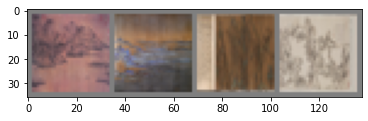

Resized_Song_Paintings Resized_Song_Paintings Resized_Ming_Paintings Resized_Ming_Paintings


In [12]:
"""
Copy from pytorch tutorial:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
"""
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

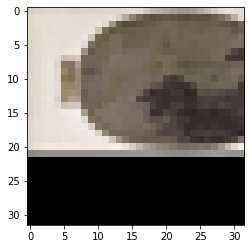

Resized_Song_Paintings
352


In [14]:
img, label = trainset[200]
imshow(img)
print(classes[label])
print(len(trainset))

2. Define a Convolutional Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [15]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding='same') #rgb, # of filters, kernel size (5x5). 6 channels is like 6 layers
        #size of the mask, depends of the size of the image. 6 layers is b/c we trace back
        #from 10 number output, if we had a bigger image we would have more layers
        self.pool = nn.MaxPool2d(2, 2) #will take from every 2x2 so 16x16, the max value
        self.conv2 = nn.Conv2d(6, 16, 5, padding='same') #number of prev channels, 16 from pool, 5x5
        self.fc1 = nn.Linear(16 * 8 * 8, 120) #fully connected layer= takes info from whole image (8x8x16)
        #add them with weights 1x120 vector
        self.fc2 = nn.Linear(120, 84) #compress, small vector 1x24,
        self.fc3 = nn.Linear(84, 10) #compress, 1X10 with all info to do classification

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #becomes 16 x 16 x 6
        x = self.pool(F.relu(self.conv2(x))) #becomes 8 x 8 x 16
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x)) #for a network to be more express, 
                                #takes into account nonlinear, only pos values
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        #output the 10 numbers, 10 classes!


net = Net()

In [16]:
print('size of batch:', images.shape)
x = net.pool(F.relu(net.conv1(images)))
print('after the first conv layer ', x.shape)
x = net.pool(F.relu(net.conv2(x)))
print('After the 2nd conv layer', x.shape)

size of batch: torch.Size([4, 3, 32, 32])
after the first conv layer  torch.Size([4, 6, 16, 16])
After the 2nd conv layer torch.Size([4, 16, 8, 8])


3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) #how fast the network is learning, remember previous steps

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

Compare ground truth (Ygt) with predicted (y^), tries to minimize y^ - Ygt, but redefining the weights of the coefficients of all the filters.

all networks have a loss function, cross rentropy is a formula that takes the log of its label and multiplies it with teh ground truth layer



In [18]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 1:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     2] loss: 0.466
[1,    12] loss: 2.279
[1,    22] loss: 2.209
[1,    32] loss: 2.166
[1,    42] loss: 2.119
[1,    52] loss: 2.062
[1,    62] loss: 1.978
[1,    72] loss: 1.921
[1,    82] loss: 1.822
[2,     2] loss: 0.334
[2,    12] loss: 1.563
[2,    22] loss: 1.311
[2,    32] loss: 0.997
[2,    42] loss: 0.811
[2,    52] loss: 0.754
[2,    62] loss: 0.705
[2,    72] loss: 0.759
[2,    82] loss: 0.781
[3,     2] loss: 0.133
[3,    12] loss: 0.760
[3,    22] loss: 0.744
[3,    32] loss: 0.798
[3,    42] loss: 0.720
[3,    52] loss: 0.765
[3,    62] loss: 0.730
[3,    72] loss: 0.729
[3,    82] loss: 0.727
[4,     2] loss: 0.129
[4,    12] loss: 0.745
[4,    22] loss: 0.708
[4,    32] loss: 0.766
[4,    42] loss: 0.764
[4,    52] loss: 0.670
[4,    62] loss: 0.761
[4,    72] loss: 0.743
[4,    82] loss: 0.711
[5,     2] loss: 0.139
[5,    12] loss: 0.699
[5,    22] loss: 0.815
[5,    32] loss: 0.694
[5,    42] loss: 0.747
[5,    52] loss: 0.710
[5,    62] loss: 0.686
[5,    72] 

Let's quickly save our trained model:



In [19]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
for more details on saving PyTorch models.

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



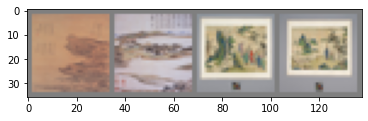

GroundTruth:  Resized_Ming_Paintings Resized_Ming_Paintings Resized_Ming_Paintings Resized_Ming_Paintings


In [20]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

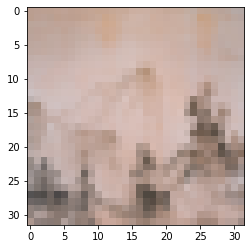

Resized_Song_Paintings
352


In [21]:
img, label = testset[50]
imshow(img)
print(classes[label])
print(len(trainset))

In [22]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [23]:
outputs = net(images)

The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let's get the index of the highest energy:

In [24]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Resized_Song_Paintings Resized_Song_Paintings Resized_Ming_Paintings Resized_Song_Paintings


In [25]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


In [26]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Resized_Ming_Paintings is 29.8 %
Accuracy for class: Resized_Song_Paintings is 92.7 %
